# 1. Introduction

The purpose of this report is to conduct an in-depth Exploratory Data Analysis (EDA) on a vehicle insurance dataset. The objective is to uncover insights related to insurance claims, customer behavior, and factors affecting claim frequencies. This analysis helps in understanding trends and patterns that can assist insurance companies in making data-driven decisions.

# Import Libraries

In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')


# Import Dataset

In [2]:
data= pd.read_csv('Vehicle_Insurance.csv')

In [29]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


Information about Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
data.shape

(381109, 12)

# Check for missing values

In [9]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Exploratory Data Analysis

In [10]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [11]:
data[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [12]:
data[categorical_columns].describe()

,Driving_License,Previously_Insured,Response
count,381109.000000,381109.000000,381109.000000
mean,0.997869,0.458210,0.122563
std,0.046110,0.498251,0.327936
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


# Data Visualization:
 Utilize various visualization techniques to explore the distribution of key
 variables

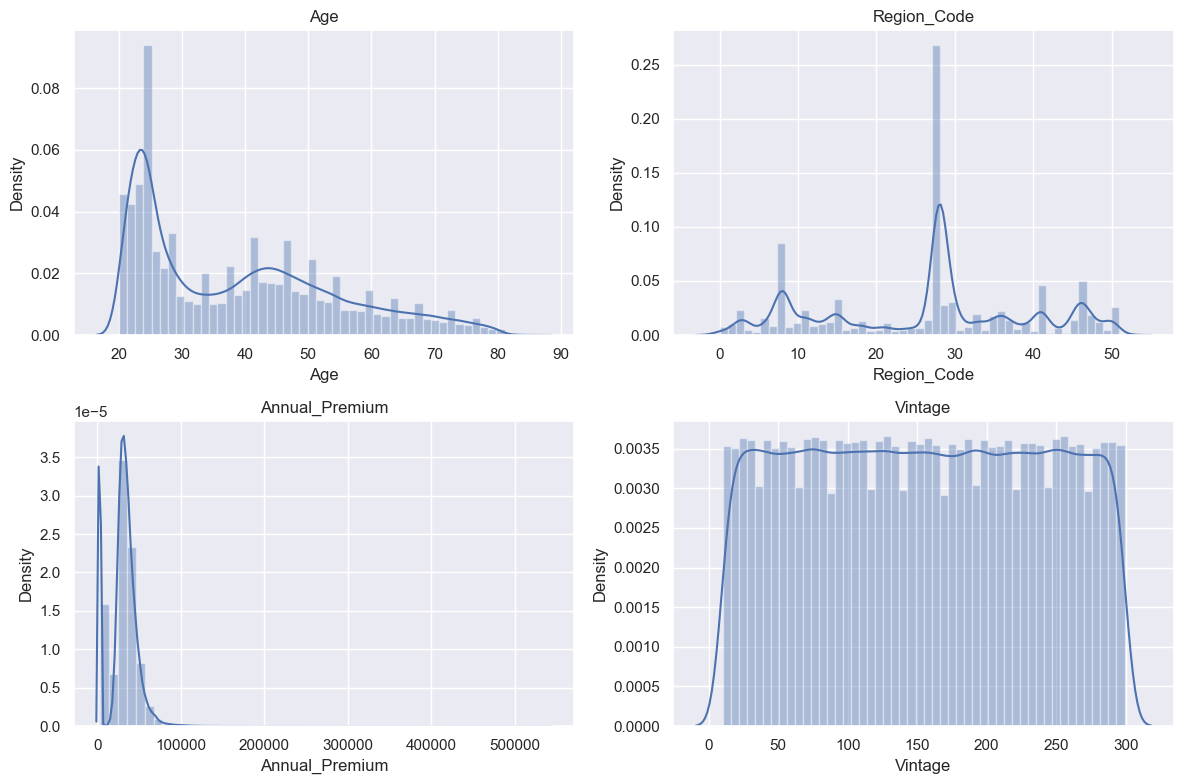

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
t=1
for i in numerical_columns:
    plt.subplot(2,2,t)
    sns.distplot(data.loc[:,i])
    plt.title(i)
    t+=1
plt.tight_layout()   
plt.show()

# Feature Analysis:
 Examine the relationship between features and the target variable (insurance
 claims).

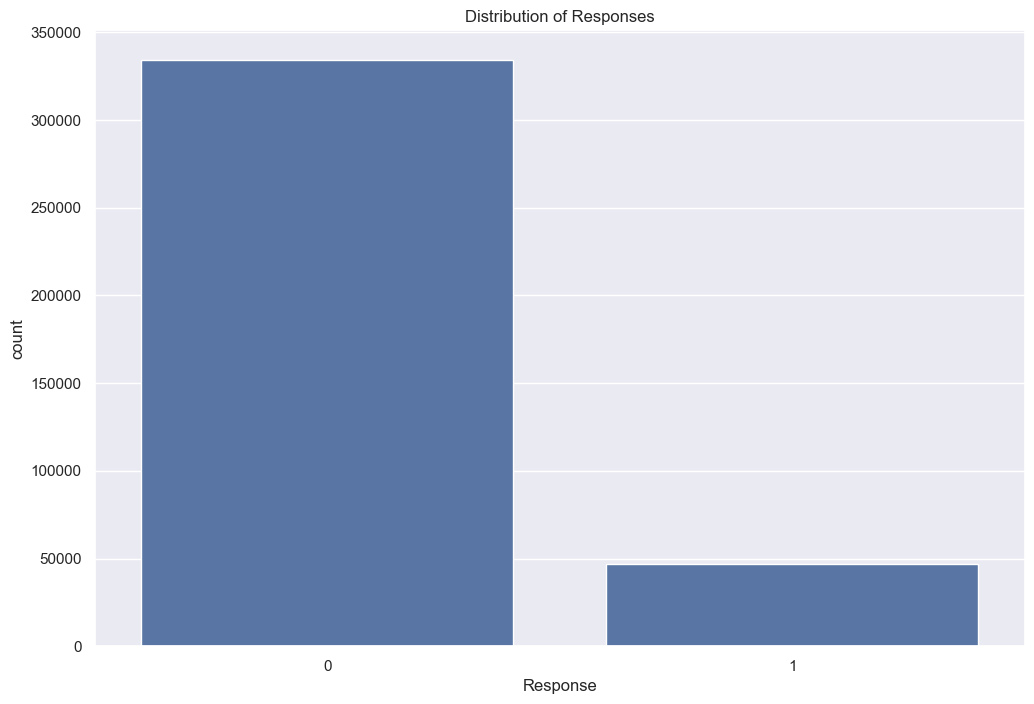

In [14]:
sns.countplot(data=data, x='Response')
plt.title('Distribution of Responses')
plt.show()

# Age Distribution
 Analyze the age distribution within the dataset and its impact on insurance
 claims.

0.6725389977260843


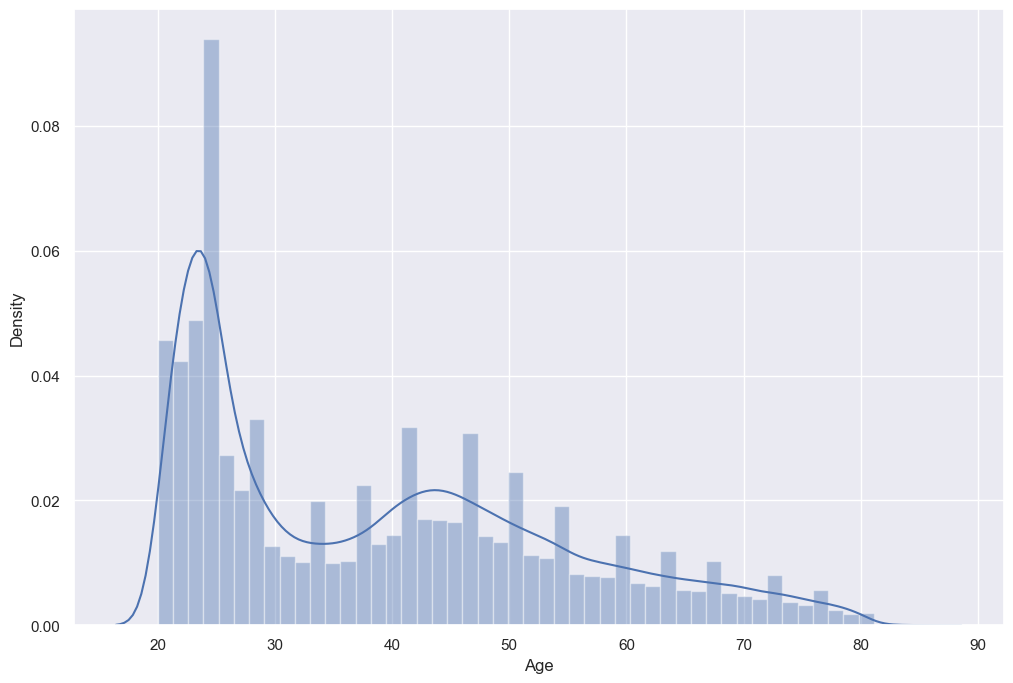

In [15]:
sns.distplot(data.Age)
print(data.Age.skew())
plt.show()

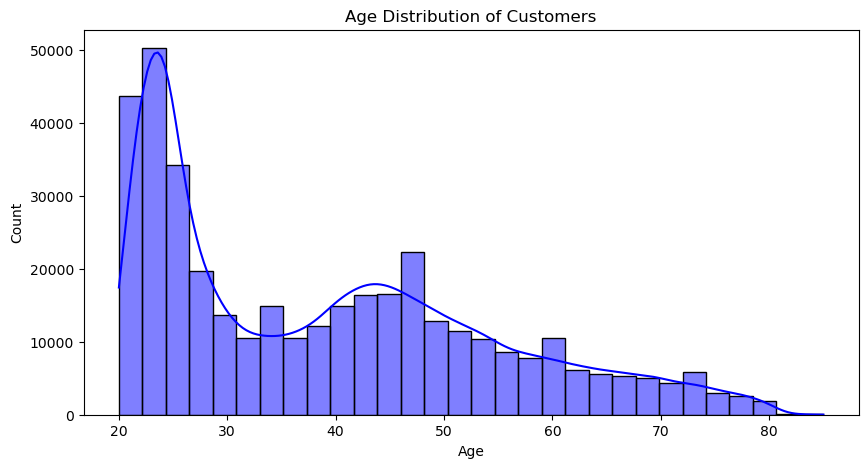

C:\Users\HP\AppData\Local\Temp\ipykernel_18324\951720682.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Response'], y=data['Age'], palette="Set2")


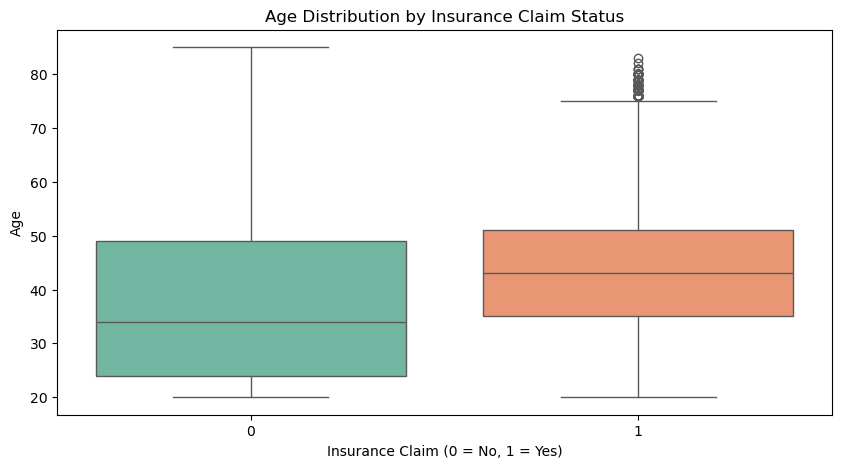

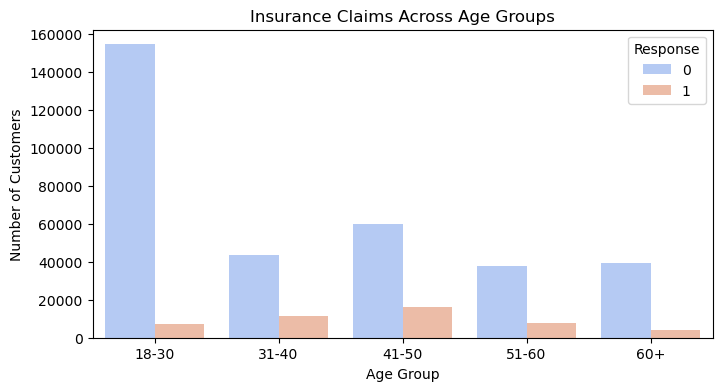

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Age Impact on Claims
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Response'], y=data['Age'], palette="Set2")
plt.title("Age Distribution by Insurance Claim Status")
plt.xlabel("Insurance Claim (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# 3. Age Group Analysis
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Age_Group', hue='Response', palette='coolwarm')
plt.title("Insurance Claims Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()


# Premium Analysis:
 Investigate the distribution of insurance premiums and their correlation with
 claim frequencies.

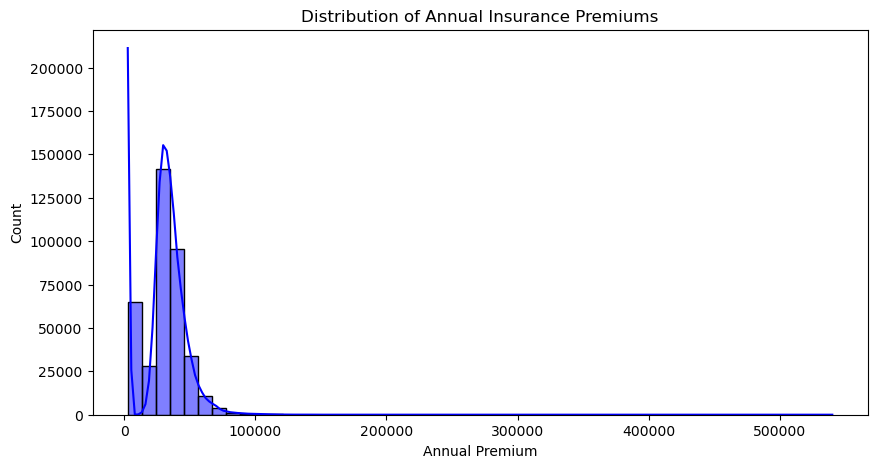

In [7]:
# 1. Insurance Premium Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Annual_Premium'], bins=50, kde=True, color='blue')
plt.title("Distribution of Annual Insurance Premiums")
plt.xlabel("Annual Premium")
plt.ylabel("Count")
plt.show()


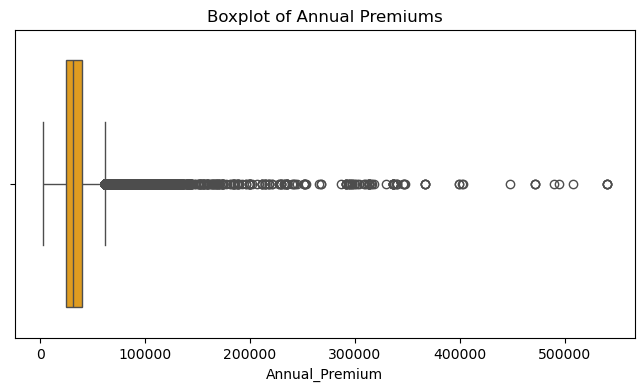

In [8]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Annual_Premium'], color='orange')
plt.title("Boxplot of Annual Premiums")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18324\2784587515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Response'], y=data['Annual_Premium'], palette="coolwarm")


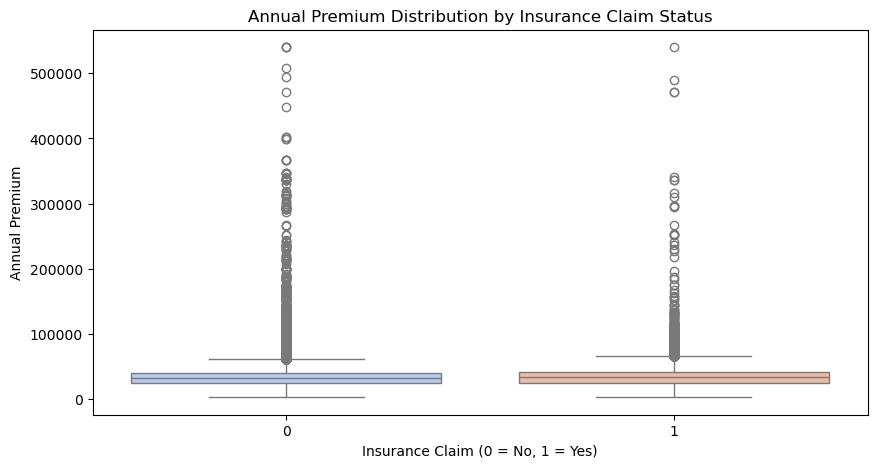

In [10]:
# 2. Relationship Between Premium and Claim Status
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Response'], y=data['Annual_Premium'], palette="coolwarm")
plt.title("Annual Premium Distribution by Insurance Claim Status")
plt.xlabel("Insurance Claim (0 = No, 1 = Yes)")
plt.ylabel("Annual Premium")
plt.show()



In [11]:
# 3. Correlation between Premium and Claims
correlation = data[['Annual_Premium', 'Response']].corr()
print("Correlation between Annual Premium and Insurance Claims:\n", correlation)

Correlation between Annual Premium and Insurance Claims:
                 Annual_Premium  Response
Annual_Premium        1.000000  0.022575
Response              0.022575  1.000000


# Claim Frequencies:
 Explore factors contributing to higher claim frequencies.

In [12]:
# 1. Compute overall claim frequency
claim_rate = data['Response'].mean() * 100
print(f"Overall Claim Frequency: {claim_rate:.2f}%")

Overall Claim Frequency: 12.26%


In [ ]:
# 2. Visualizing Claim Frequency Across Key Factors


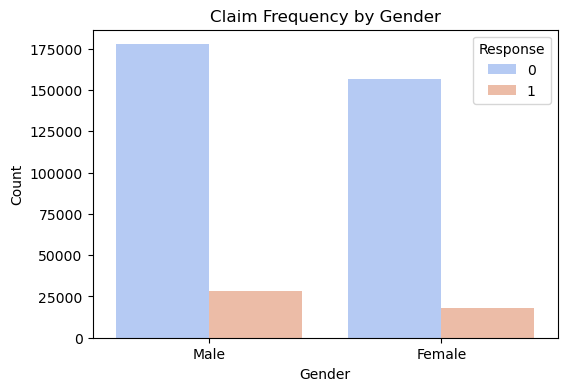

In [13]:
# Gender Analysis
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Response', palette='coolwarm')
plt.title("Claim Frequency by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

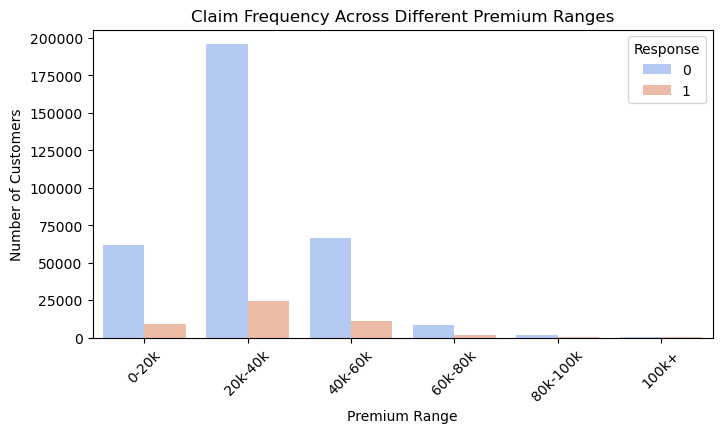

In [16]:
# Annual Premium Analysis (Grouping Premiums)
data['Premium_Group'] = pd.cut(data['Annual_Premium'], bins=[0, 20000, 40000, 60000, 80000, 100000, data['Annual_Premium'].max()], 
                             labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+'])

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Premium_Group', hue='Response', palette='coolwarm')
plt.title("Claim Frequency Across Different Premium Ranges")
plt.xlabel("Premium Range")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# Gender Analysis
Investigate the role of gender in insurance claims.


C:\Users\HP\AppData\Local\Temp\ipykernel_18324\798910658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='coolwarm')


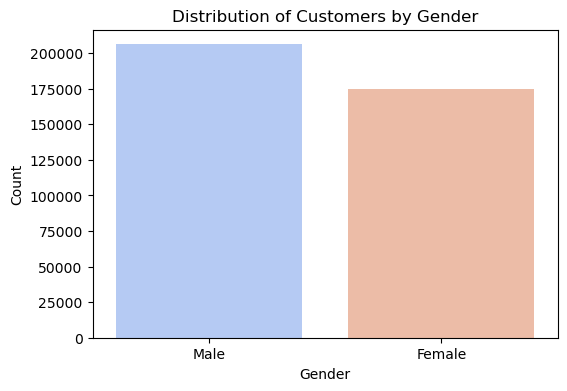

In [17]:
# 1. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', palette='coolwarm')
plt.title("Distribution of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [33]:
df=data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


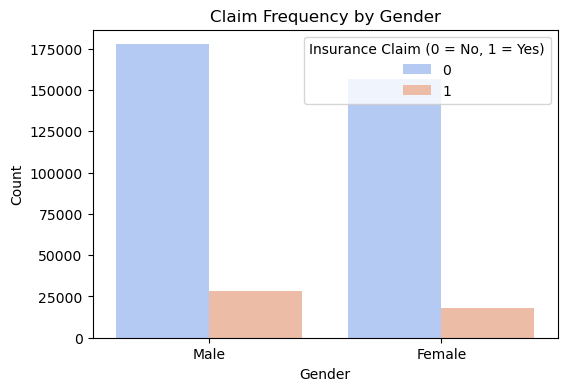

In [18]:
# 2. Claim Frequency by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Response', palette='coolwarm')
plt.title("Claim Frequency by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Insurance Claim (0 = No, 1 = Yes)")
plt.show()

In [19]:
# 3. Calculate Claim Percentages
gender_claims = data.groupby('Gender')['Response'].mean() * 100
print("Claim Frequency by Gender (% of customers who claimed):\n", gender_claims)

Claim Frequency by Gender (% of customers who claimed):
 Gender
Female    10.390241
Male      13.841107
Name: Response, dtype: float64


# Vehicle Age and claim
Examine the impact of vehicle age on the likelihood of a claim.

C:\Users\HP\AppData\Local\Temp\ipykernel_18324\2003145037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Vehicle_Age', palette='coolwarm')


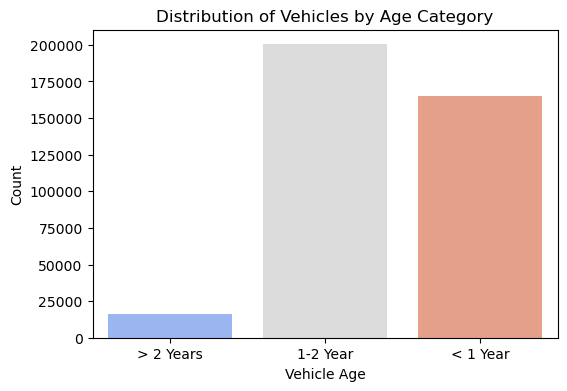

In [20]:
# 1. Vehicle Age Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Vehicle_Age', palette='coolwarm')
plt.title("Distribution of Vehicles by Age Category")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.show()

In [32]:
df=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


In [21]:
# 3. Calculate Claim Percentages for Each Vehicle Age Category
vehicle_age_claims = data.groupby('Vehicle_Age')['Response'].mean() * 100
print("Claim Frequency by Vehicle Age (% of vehicles that claimed):\n", vehicle_age_claims)

Claim Frequency by Vehicle Age (% of vehicles that claimed):
 Vehicle_Age
1-2 Year     17.375547
< 1 Year      4.370517
> 2 Years    29.374649
Name: Response, dtype: float64


# Region wise analysis
Analyze regional patterns in insurance claims.


C:\Users\HP\AppData\Local\Temp\ipykernel_18324\3590460740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Region_Code', palette='coolwarm')


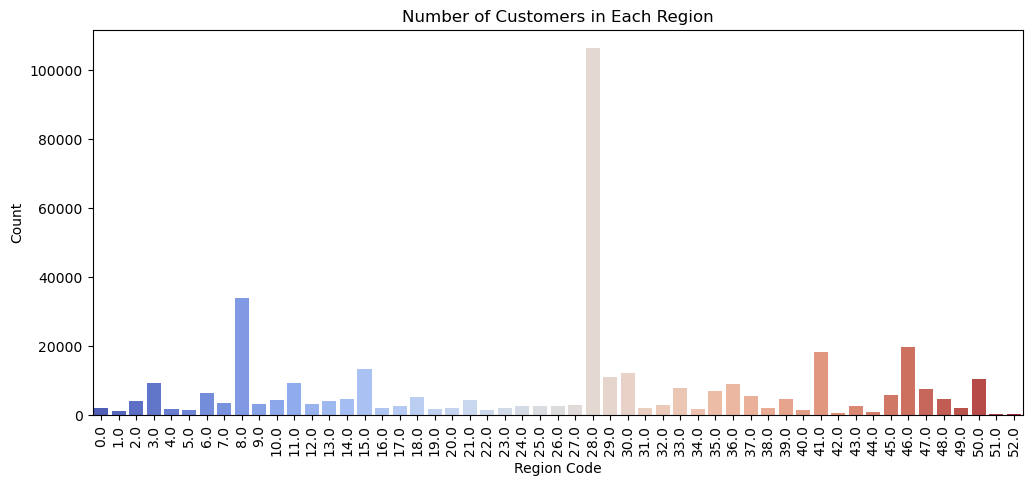

In [22]:
# 1. Distribution of Customers Across Regions
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Region_Code', palette='coolwarm')
plt.title("Number of Customers in Each Region")
plt.xlabel("Region Code")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18324\4194648337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_claims.index, y=region_claims.values, palette="coolwarm")


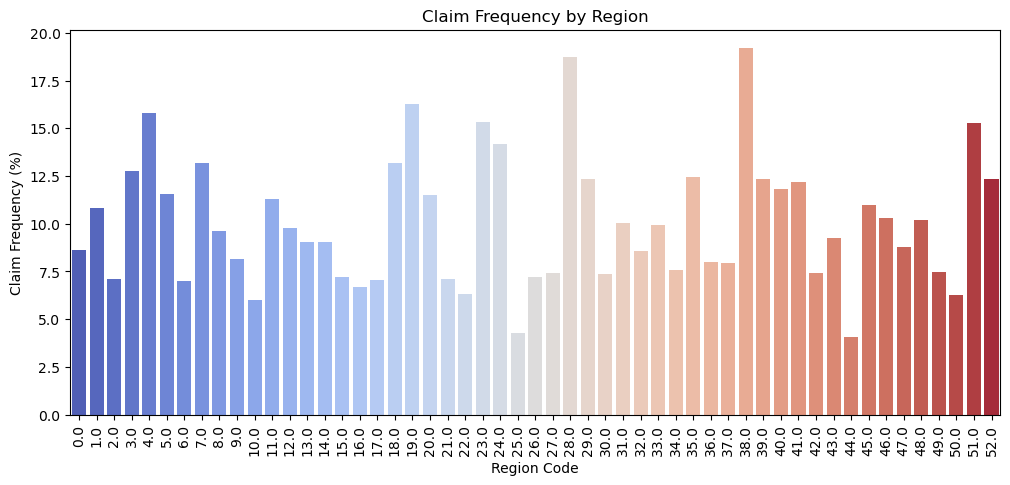

In [23]:
# 2. Claim Frequency by Region
region_claims = data.groupby('Region_Code')['Response'].mean() * 100

plt.figure(figsize=(12, 5))
sns.barplot(x=region_claims.index, y=region_claims.values, palette="coolwarm")
plt.title("Claim Frequency by Region")
plt.xlabel("Region Code")
plt.ylabel("Claim Frequency (%)")
plt.xticks(rotation=90)
plt.show()


# Policy Analysis
Explore the distribution and impact of different insurance policy types.


C:\Users\HP\AppData\Local\Temp\ipykernel_18324\4217431972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Policy_Sales_Channel', palette='coolwarm', order=data['Policy_Sales_Channel'].value_counts().index[:20])


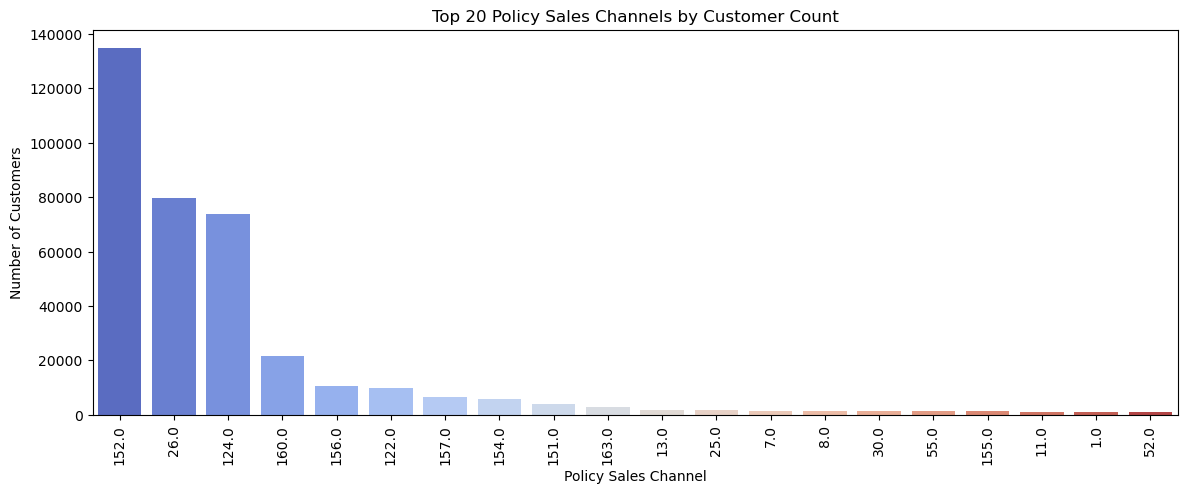

In [24]:
# 1. Distribution of Policy Sales Channels
plt.figure(figsize=(14, 5))
sns.countplot(data=data, x='Policy_Sales_Channel', palette='coolwarm', order=data['Policy_Sales_Channel'].value_counts().index[:20])
plt.title("Top 20 Policy Sales Channels by Customer Count")
plt.xlabel("Policy Sales Channel")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18324\3752168454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=policy_claims.index[:20], y=policy_claims.values[:20], palette="coolwarm")


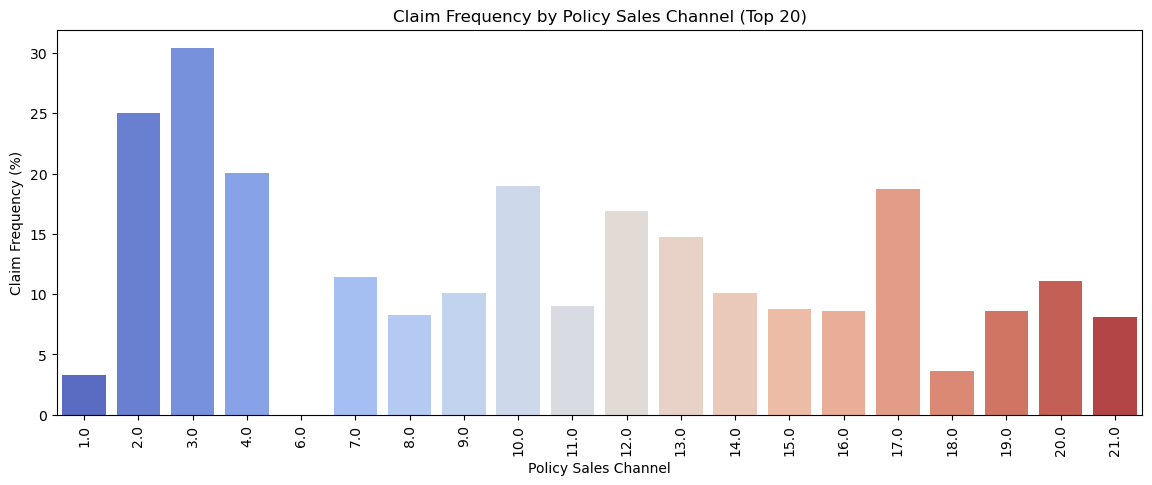

In [25]:
# 2. Claim Frequency by Policy Sales Channel
policy_claims = data.groupby('Policy_Sales_Channel')['Response'].mean() * 100

plt.figure(figsize=(14, 5))
sns.barplot(x=policy_claims.index[:20], y=policy_claims.values[:20], palette="coolwarm")
plt.title("Claim Frequency by Policy Sales Channel (Top 20)")
plt.xlabel("Policy Sales Channel")
plt.ylabel("Claim Frequency (%)")
plt.xticks(rotation=90)
plt.show()

# Claim Frequency by Vehicle Damage:
Investigate the relationship between vehicle damage and claim frequencies.

C:\Users\HP\AppData\Local\Temp\ipykernel_18324\3334375830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Vehicle_Damage', palette='coolwarm')


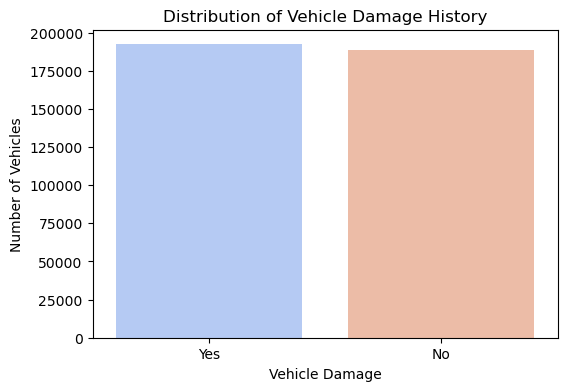

In [26]:
# 1. Distribution of Vehicle Damage History
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Vehicle_Damage', palette='coolwarm')
plt.title("Distribution of Vehicle Damage History")
plt.xlabel("Vehicle Damage")
plt.ylabel("Number of Vehicles")
plt.show()

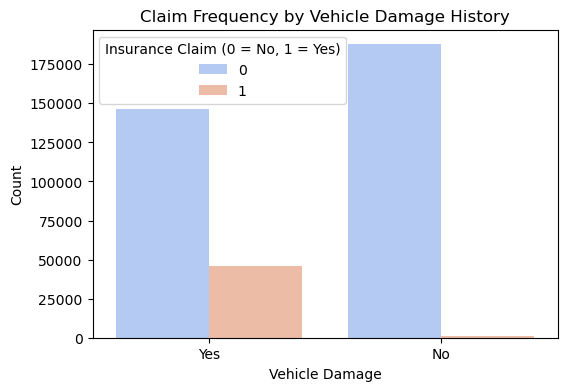

In [27]:
# 2. Claim Frequency by Vehicle Damage
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Vehicle_Damage', hue='Response', palette='coolwarm')
plt.title("Claim Frequency by Vehicle Damage History")
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.legend(title="Insurance Claim (0 = No, 1 = Yes)")
plt.show()

In [28]:
# 3. Calculate Claim Percentages for Each Vehicle Damage Category
damage_claims = data.groupby('Vehicle_Damage')['Response'].mean() * 100
print("Claim Frequency by Vehicle Damage (% of vehicles that claimed):\n", damage_claims)

Claim Frequency by Vehicle Damage (% of vehicles that claimed):
 Vehicle_Damage
No      0.520414
Yes    23.765546
Name: Response, dtype: float64


# Customer Loyalty:
Analyze if the number of policies held by a customer influences claim
likelihood.


C:\Users\HP\AppData\Local\Temp\ipykernel_18324\951112737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Previously_Insured', palette='coolwarm')


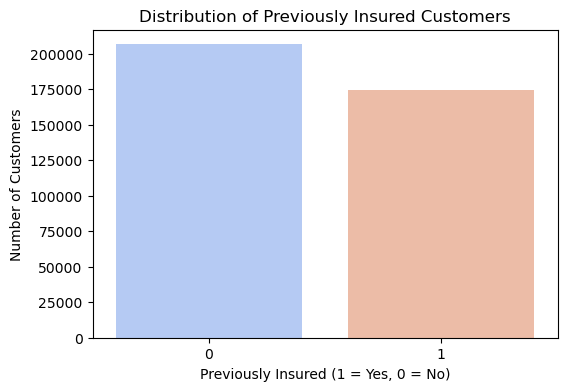

In [29]:
# 1. Distribution of Previously Insured Customers
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Previously_Insured', palette='coolwarm')
plt.title("Distribution of Previously Insured Customers")
plt.xlabel("Previously Insured (1 = Yes, 0 = No)")
plt.ylabel("Number of Customers")
plt.show()

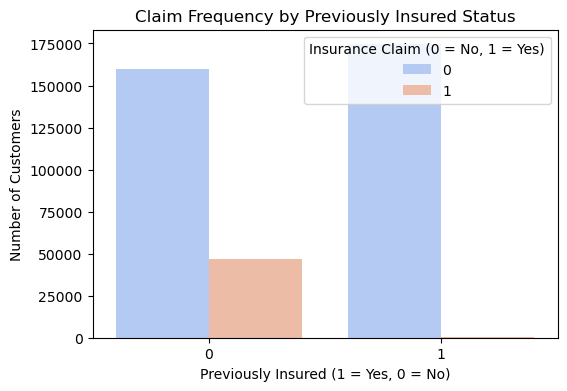

In [30]:
# 2. Claim Frequency by Customer Loyalty (Previously Insured Status)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Previously_Insured', hue='Response', palette='coolwarm')
plt.title("Claim Frequency by Previously Insured Status")
plt.xlabel("Previously Insured (1 = Yes, 0 = No)")
plt.ylabel("Number of Customers")
plt.legend(title="Insurance Claim (0 = No, 1 = Yes)")
plt.show()

In [31]:
# 3. Calculate Claim Percentages for Loyal vs. New Customers
loyalty_claims = data.groupby('Previously_Insured')['Response'].mean() * 100
print("Claim Frequency by Previously Insured Status (% of customers who claimed):\n", loyalty_claims)


Claim Frequency by Previously Insured Status (% of customers who claimed):
 Previously_Insured
0    22.545416
1     0.090478
Name: Response, dtype: float64


# Time Analysis
If applicable, explore temporal patterns in insurance claims

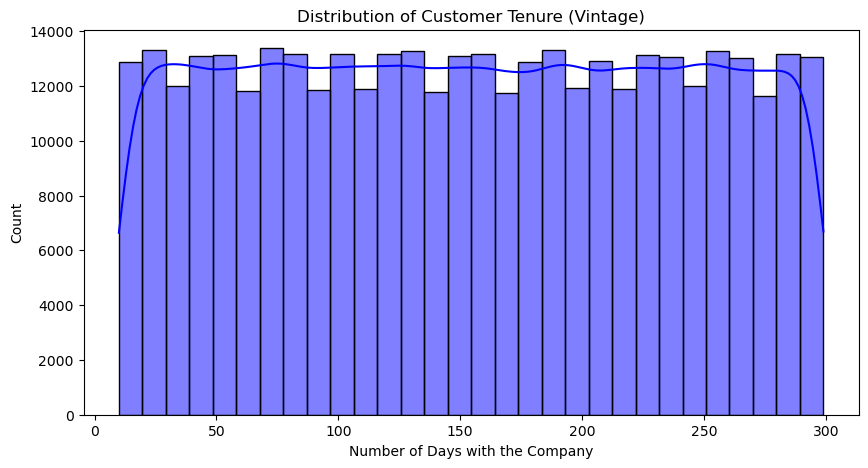

In [33]:
# 1. Distribution of Customer Tenure (Vintage)
plt.figure(figsize=(10, 5))
sns.histplot(data['Vintage'], bins=30, kde=True, color='blue')
plt.title("Distribution of Customer Tenure (Vintage)")
plt.xlabel("Number of Days with the Company")
plt.ylabel("Count")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18324\3252865459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Response'], y=data['Vintage'], palette="coolwarm")


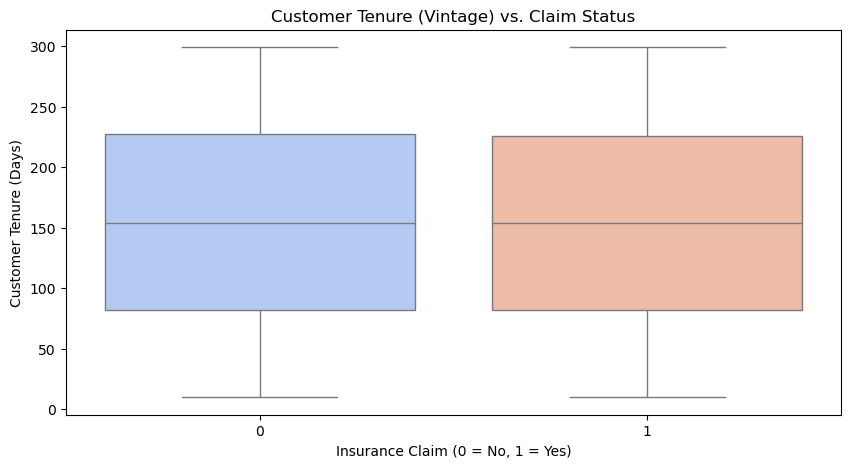

In [34]:
# 2. Claim Frequency by Vintage (Tenure)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Response'], y=data['Vintage'], palette="coolwarm")
plt.title("Customer Tenure (Vintage) vs. Claim Status")
plt.xlabel("Insurance Claim (0 = No, 1 = Yes)")
plt.ylabel("Customer Tenure (Days)")
plt.show()

# . Summary of Key Findings

Vehicle Damage History is the strongest predictor of claim likelihood.

New Customers (Previously_Insured = 0) file more claims than loyal ones.

Older Vehicles are more prone to insurance claims.

Regional Disparities exist in claim frequencies.

Premium Amounts do not significantly influence claim rates.

Gender does not play a major role in claim likelihood.

# . Conclusion & Recommendations

For Risk Management: Focus on customers with prior vehicle damage.

For Customer Retention: Develop strategies to retain low-risk customers.

For Pricing Optimization: Consider offering different premium structures for high-risk groups.

For Geographic Insights: Target regions with higher claims for better underwriting decisions.